In [1]:
import os
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import re
import emoji

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
import html 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#  Random Under Sampling 

In [2]:
## Data Loading 

df = pd.read_csv("/Users/sakshyamdahal/Desktop/MS_Data_Science/capstone_game_recommender/clean_df")
df.head(5)

,Unnamed: 0,text,fraudulent,clean_text,token
0,0,"Marketing Intern We're Food52, and we've creat...",0,market intern be food weve create groundbreaki...,"['market', 'intern', 'be', 'food', 'weve', 'cr..."
1,1,Customer Service - Cloud Video Production 90 S...,0,customer service cloud video production second...,"['customer', 'service', 'cloud', 'video', 'pro..."
2,2,Commissioning Machinery Assistant (CMA) Valor ...,0,commission machinery assistant cma valor servi...,"['commission', 'machinery', 'assistant', 'cma'..."
3,3,Account Executive - Washington DC Our passion ...,0,account executive washington dc passion improv...,"['account', 'executive', 'washington', 'dc', '..."
4,4,Bill Review Manager SpotSource Solutions LLC i...,0,bill review manager spotsource solutions llc g...,"['bill', 'review', 'manager', 'spotsource', 's..."


In [3]:
X=df.drop(['fraudulent','text', 'token','Unnamed: 0'], axis=1)
y=df['fraudulent']

type(X)

pandas.core.frame.DataFrame

In [4]:
X.shape

(17880, 1)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = set(nltk.corpus.stopwords.words('english'))



tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(X["clean_text"])
tfidf_text_vectors.shape

(17880, 18370)

In [6]:
count_text_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(X['clean_text'])
count_text_vectors.shape




(17880, 18370)

In [7]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

under_sample = RandomUnderSampler(sampling_strategy = 'majority')

X_tf, y_tf= under_sample.fit_resample(tfidf_text_vectors, y)

X_bow, y_bow= under_sample.fit_resample(count_text_vectors, y)


X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf,y_tf, test_size=0.20,random_state=0,stratify=y_tf)



X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow,y_bow, test_size=0.20,random_state=0,stratify=y_bow)



In [8]:
y_tf.value_counts()

0    866
1    866
Name: fraudulent, dtype: int64


# Modeling 

## Logistic Regression tfidf

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
logreg.fit(X_train_tf, y_train_tf)



LogisticRegression(C=3, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       174
           1       0.93      0.88      0.90       173

    accuracy                           0.90       347
   macro avg       0.91      0.90      0.90       347
weighted avg       0.91      0.90      0.90       347



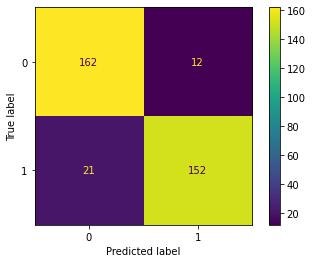

In [10]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



lr_predict = logreg.predict(X_test_tf)

print(classification_report(y_test_tf, lr_predict))


cm_lr =confusion_matrix(y_test_tf, lr_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()




In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy", accuracy_score(y_test_tf, lr_predict))


print("F1 Score", f1_score(y_test_tf, lr_predict))
print("Precision", precision_score(y_test_tf, lr_predict))
print("Recall", recall_score(y_test_tf, lr_predict))




Accuracy 0.9048991354466859
F1 Score 0.9020771513353116
Precision 0.926829268292683
Recall 0.8786127167630058


## Logistic Regression Bow


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
logreg.fit(X_train_bow, y_train_bow)




LogisticRegression(C=3, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       174
           1       0.85      0.91      0.88       173

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.88      0.87      0.87       347



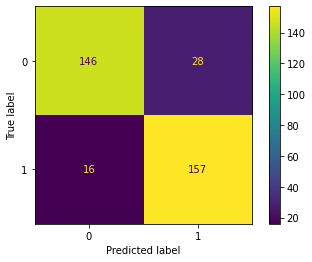

In [13]:
lr_predict = logreg.predict(X_test_bow)

print(classification_report(y_test_bow, lr_predict))


cm_lr =confusion_matrix(y_test_bow, lr_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()




In [14]:
print("Accuracy", accuracy_score(y_test_bow, lr_predict))


print("F1 Score", f1_score(y_test_bow, lr_predict))
print("Precision", precision_score(y_test_bow, lr_predict))
print("Recall", recall_score(y_test_bow, lr_predict))




Accuracy 0.8731988472622478
F1 Score 0.8770949720670391
Precision 0.8486486486486486
Recall 0.9075144508670521


## Random Forest tf-idf

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)



RandomForestClassifier(max_depth=300, n_estimators=300, random_state=2)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       174
           1       0.93      0.90      0.92       173

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347



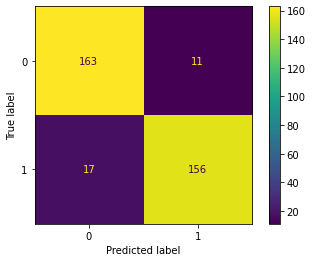

In [16]:

rf_predict = rf.predict(X_test_tf)

print(classification_report(y_test_tf, rf_predict))

cm_rf =confusion_matrix(y_test_tf, rf_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()





In [17]:

print("Accuracy", accuracy_score(y_test_tf, rf_predict))


print("F1 Score", f1_score(y_test_tf, rf_predict))
print("Precision", precision_score(y_test_tf, rf_predict))
print("Recall", recall_score(y_test_tf, rf_predict))





Accuracy 0.9193083573487032
F1 Score 0.9176470588235294
Precision 0.9341317365269461
Recall 0.9017341040462428


## Random Forest BoW

In [18]:
rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_bow, y_train_bow)

RandomForestClassifier(max_depth=300, n_estimators=300, random_state=2)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       174
           1       0.89      0.91      0.90       173

    accuracy                           0.90       347
   macro avg       0.90      0.90      0.90       347
weighted avg       0.90      0.90      0.90       347



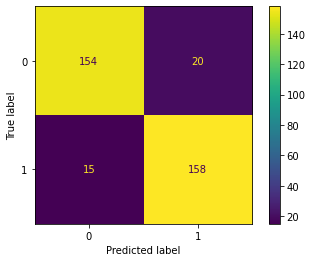

In [19]:

rf_predict = rf.predict(X_test_bow)

print(classification_report(y_test_bow, rf_predict))

cm_rf =confusion_matrix(y_test_bow, rf_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()





In [20]:
print("Accuracy", accuracy_score(y_test_bow, rf_predict))


print("F1 Score", f1_score(y_test_bow, rf_predict))
print("Precision", precision_score(y_test_bow, rf_predict))
print("Recall", recall_score(y_test_bow, rf_predict))






Accuracy 0.899135446685879
F1 Score 0.9002849002849002
Precision 0.8876404494382022
Recall 0.9132947976878613


## Naive Bayes tf-idf

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

NB = MultinomialNB()
NB.fit(X_train_tf, y_train_tf)



MultinomialNB()

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       174
           1       0.87      0.90      0.89       173

    accuracy                           0.88       347
   macro avg       0.89      0.88      0.88       347
weighted avg       0.89      0.88      0.88       347



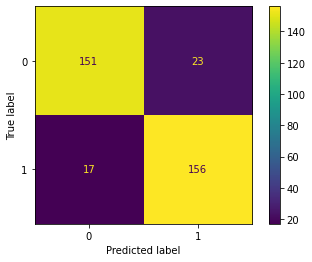

In [22]:

nb_predict = NB.predict(X_test_tf)

print(classification_report(y_test_tf, nb_predict))

cm_nb =confusion_matrix(y_test_tf, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()



In [23]:

print("Accuracy", accuracy_score(y_test_tf, nb_predict))


print("F1 Score", f1_score(y_test_tf, nb_predict))
print("Precision", precision_score(y_test_tf, nb_predict))
print("Recall", recall_score(y_test_tf, nb_predict))





Accuracy 0.8847262247838616
F1 Score 0.8863636363636364
Precision 0.8715083798882681
Recall 0.9017341040462428


## Naive Bayes BoW

In [24]:
NB = MultinomialNB()
NB.fit(X_train_bow, y_train_bow)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       174
           1       0.88      0.88      0.88       173

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.88      0.88      0.88       347



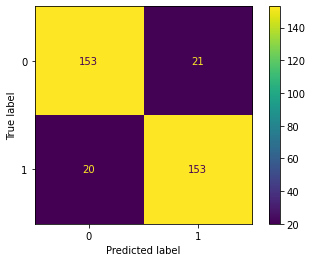

In [25]:

nb_predict = NB.predict(X_test_bow)

print(classification_report(y_test_bow, nb_predict))

cm_nb =confusion_matrix(y_test_bow, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()






In [26]:

print("Accuracy", accuracy_score(y_test_bow, nb_predict))


print("F1 Score", f1_score(y_test_bow, nb_predict))
print("Precision", precision_score(y_test_bow, nb_predict))
print("Recall", recall_score(y_test_bow, nb_predict))





Accuracy 0.8818443804034583
F1 Score 0.8818443804034581
Precision 0.8793103448275862
Recall 0.884393063583815


## Multi Layer Perceptron tf-idf

In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)   
mlp.fit(X_train_tf,y_train_tf)



MLPClassifier(hidden_layer_sizes=(100, 50, 2), max_iter=1000, random_state=5)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       174
           1       0.92      0.92      0.92       173

    accuracy                           0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347



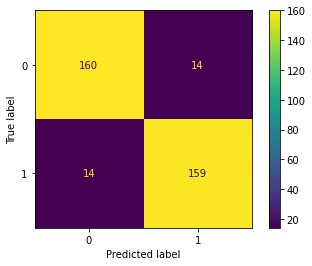

In [28]:
mlp_predict = mlp.predict(X_test_tf)

print(classification_report(y_test_tf, mlp_predict))

cm_mlp =confusion_matrix(y_test_tf, mlp_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()






In [29]:

print("Accuracy", accuracy_score(y_test_tf, mlp_predict))


print("F1 Score", f1_score(y_test_tf, mlp_predict))
print("Precision", precision_score(y_test_tf, mlp_predict))
print("Recall", recall_score(y_test_tf, mlp_predict))




Accuracy 0.9193083573487032
F1 Score 0.9190751445086706
Precision 0.9190751445086706
Recall 0.9190751445086706


## Multi Layer Perceptron BoW



In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)  
mlp.fit(X_train_bow,y_train_bow)




MLPClassifier(hidden_layer_sizes=(100, 50, 2), max_iter=1000, random_state=5)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       174
           1       0.88      0.94      0.91       173

    accuracy                           0.90       347
   macro avg       0.90      0.90      0.90       347
weighted avg       0.90      0.90      0.90       347



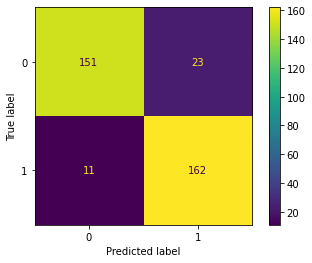

In [31]:
mlp_predict = mlp.predict(X_test_bow)

print(classification_report(y_test_bow, mlp_predict))

cm_mlp =confusion_matrix(y_test_bow, mlp_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()




In [32]:

print("Accuracy", accuracy_score(y_test_bow, mlp_predict))


print("F1 Score", f1_score(y_test_bow, mlp_predict))
print("Precision", precision_score(y_test_bow, mlp_predict))
print("Recall", recall_score(y_test_bow, mlp_predict))






Accuracy 0.9020172910662824
F1 Score 0.9050279329608939
Precision 0.8756756756756757
Recall 0.9364161849710982


## KNN tf-idf

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')

knn.fit(X_train_tf,y_train_tf)



KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       174
           1       0.86      0.89      0.88       173

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



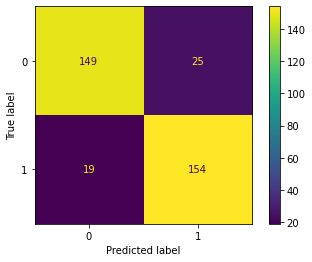

In [34]:

knn_predict = knn.predict(X_test_tf)

print(classification_report(y_test_tf, knn_predict))


cm_knn =confusion_matrix(y_test_tf, knn_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()



In [35]:

print("Accuracy", accuracy_score(y_test_tf, knn_predict))


print("F1 Score", f1_score(y_test_tf, knn_predict))
print("Precision", precision_score(y_test_tf, knn_predict))
print("Recall", recall_score(y_test_tf, knn_predict))



Accuracy 0.8731988472622478
F1 Score 0.875
Precision 0.8603351955307262
Recall 0.8901734104046243


## KNN BoW

In [36]:
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')

knn.fit(X_train_bow,y_train_bow)




KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.96      0.37      0.54       174
           1       0.61      0.98      0.75       173

    accuracy                           0.68       347
   macro avg       0.78      0.68      0.64       347
weighted avg       0.78      0.68      0.64       347



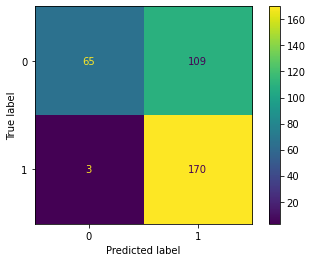

In [37]:

knn_predict = knn.predict(X_test_bow)

print(classification_report(y_test_bow, knn_predict))


cm_knn =confusion_matrix(y_test_bow, knn_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()



In [38]:

print("Accuracy", accuracy_score(y_test_bow, knn_predict))


print("F1 Score", f1_score(y_test_bow, knn_predict))
print("Precision", precision_score(y_test_bow, knn_predict))
print("Recall", recall_score(y_test_bow, knn_predict))







Accuracy 0.6772334293948127
F1 Score 0.752212389380531
Precision 0.6093189964157706
Recall 0.9826589595375722


## Support Vector Machine tf-idf

In [39]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', gamma = 'auto' )

svc.fit(X_train_tf, y_train_tf)



SVC(gamma='auto', kernel='linear')

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       174
           1       0.94      0.88      0.91       173

    accuracy                           0.91       347
   macro avg       0.91      0.91      0.91       347
weighted avg       0.91      0.91      0.91       347



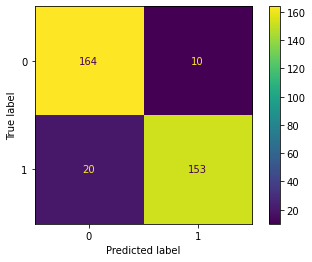

In [40]:

svm_predict = svc.predict(X_test_tf)

print(classification_report(y_test_tf, svm_predict))

cm_svm =confusion_matrix(y_test_tf, svm_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()




In [41]:

print("Accuracy", accuracy_score(y_test_tf, svm_predict))


print("F1 Score", f1_score(y_test_tf, svm_predict))
print("Precision", precision_score(y_test_tf, svm_predict))
print("Recall", recall_score(y_test_tf, svm_predict))





Accuracy 0.9135446685878963
F1 Score 0.9107142857142857
Precision 0.9386503067484663
Recall 0.884393063583815


## SVM BoW

In [42]:
svc = SVC(kernel = 'linear', gamma = 'auto' )

svc.fit(X_train_bow, y_train_bow)

SVC(gamma='auto', kernel='linear')

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       174
           1       0.83      0.91      0.87       173

    accuracy                           0.86       347
   macro avg       0.86      0.86      0.86       347
weighted avg       0.86      0.86      0.86       347



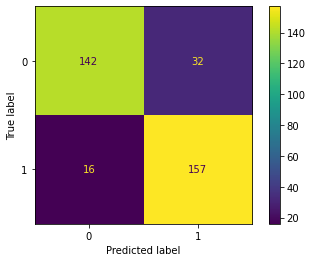

In [43]:

svm_predict = svc.predict(X_test_bow)

print(classification_report(y_test_bow, svm_predict))

cm_svm =confusion_matrix(y_test_bow, svm_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()





In [44]:

print("Accuracy", accuracy_score(y_test_bow, svm_predict))


print("F1 Score", f1_score(y_test_bow, svm_predict))
print("Precision", precision_score(y_test_bow, svm_predict))
print("Recall", recall_score(y_test_bow, svm_predict))






Accuracy 0.861671469740634
F1 Score 0.8674033149171272
Precision 0.8306878306878307
Recall 0.9075144508670521


## AUC  Curve  of TF-IDF Vectorizer


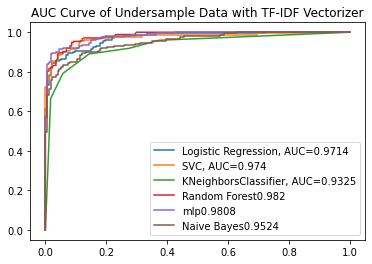

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

plt.figure(0).clf()
plt.title("AUC Curve of Undersample Data with TF-IDF Vectorizer")

#fit logistic regression model and plot ROC curve
lr = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
lr.fit(X_train_tf, y_train_tf)
y_pred_lr = lr.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )
svc.fit(X_train_tf, y_train_tf)
y_pred_svc = svc.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_svc)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))



#fit gradient boosted model and plot ROC curve
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')
knn.fit(X_train_tf, y_train_tf)
y_pred_knn = knn.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))


rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)
y_pred_rf = rf.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest"+str(auc))

mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)   
mlp.fit(X_train_tf,y_train_tf)
y_pred_mlp = mlp.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_mlp)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_mlp), 4)
plt.plot(fpr,tpr,label="mlp"+str(auc))



nb = MultinomialNB()
nb.fit(X_train_tf, y_train_tf)
y_pred_nb = nb.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes"+str(auc))



#add legend
plt.legend()





## AUC of BoW Vectorizer


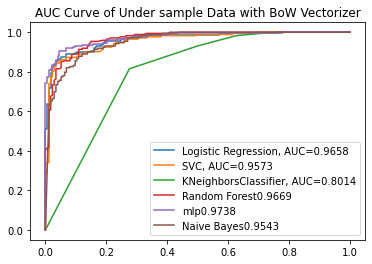

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

plt.figure(0).clf()

plt.title("AUC Curve of Under sample Data with BoW Vectorizer")

#fit logistic regression model and plot ROC curve
lr =LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
lr.fit(X_train_bow, y_train_bow)
y_pred_lr = lr.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )
svc.fit(X_train_bow, y_train_bow)
y_pred_svc = svc.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_svc)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))



#fit gradient boosted model and plot ROC curve
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')
knn.fit(X_train_bow, y_train_bow)
y_pred_knn = knn.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))


rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_bow, y_train_bow)
y_pred_rf = rf.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest"+str(auc))

mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)  
mlp.fit(X_train_bow,y_train_bow)
y_pred_mlp = mlp.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_mlp)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_mlp), 4)
plt.plot(fpr,tpr,label="mlp"+str(auc))



nb = MultinomialNB()
nb.fit(X_train_bow, y_train_bow)
y_pred_nb = nb.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes"+str(auc))



#add legend
plt.legend()





